### Housing Price Prediction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn
import numpy as np

%matplotlib inline 

In [2]:

from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
data=data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'], axis = 1)

In [8]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
                ... 
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual   

In [10]:
1179/1460

0.8075342465753425

In [14]:
data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [15]:
data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [16]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [17]:
data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [18]:
data.MSZoning.isnull().any()

False

In [19]:
1151/1460

0.7883561643835616

In [20]:
data.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [21]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

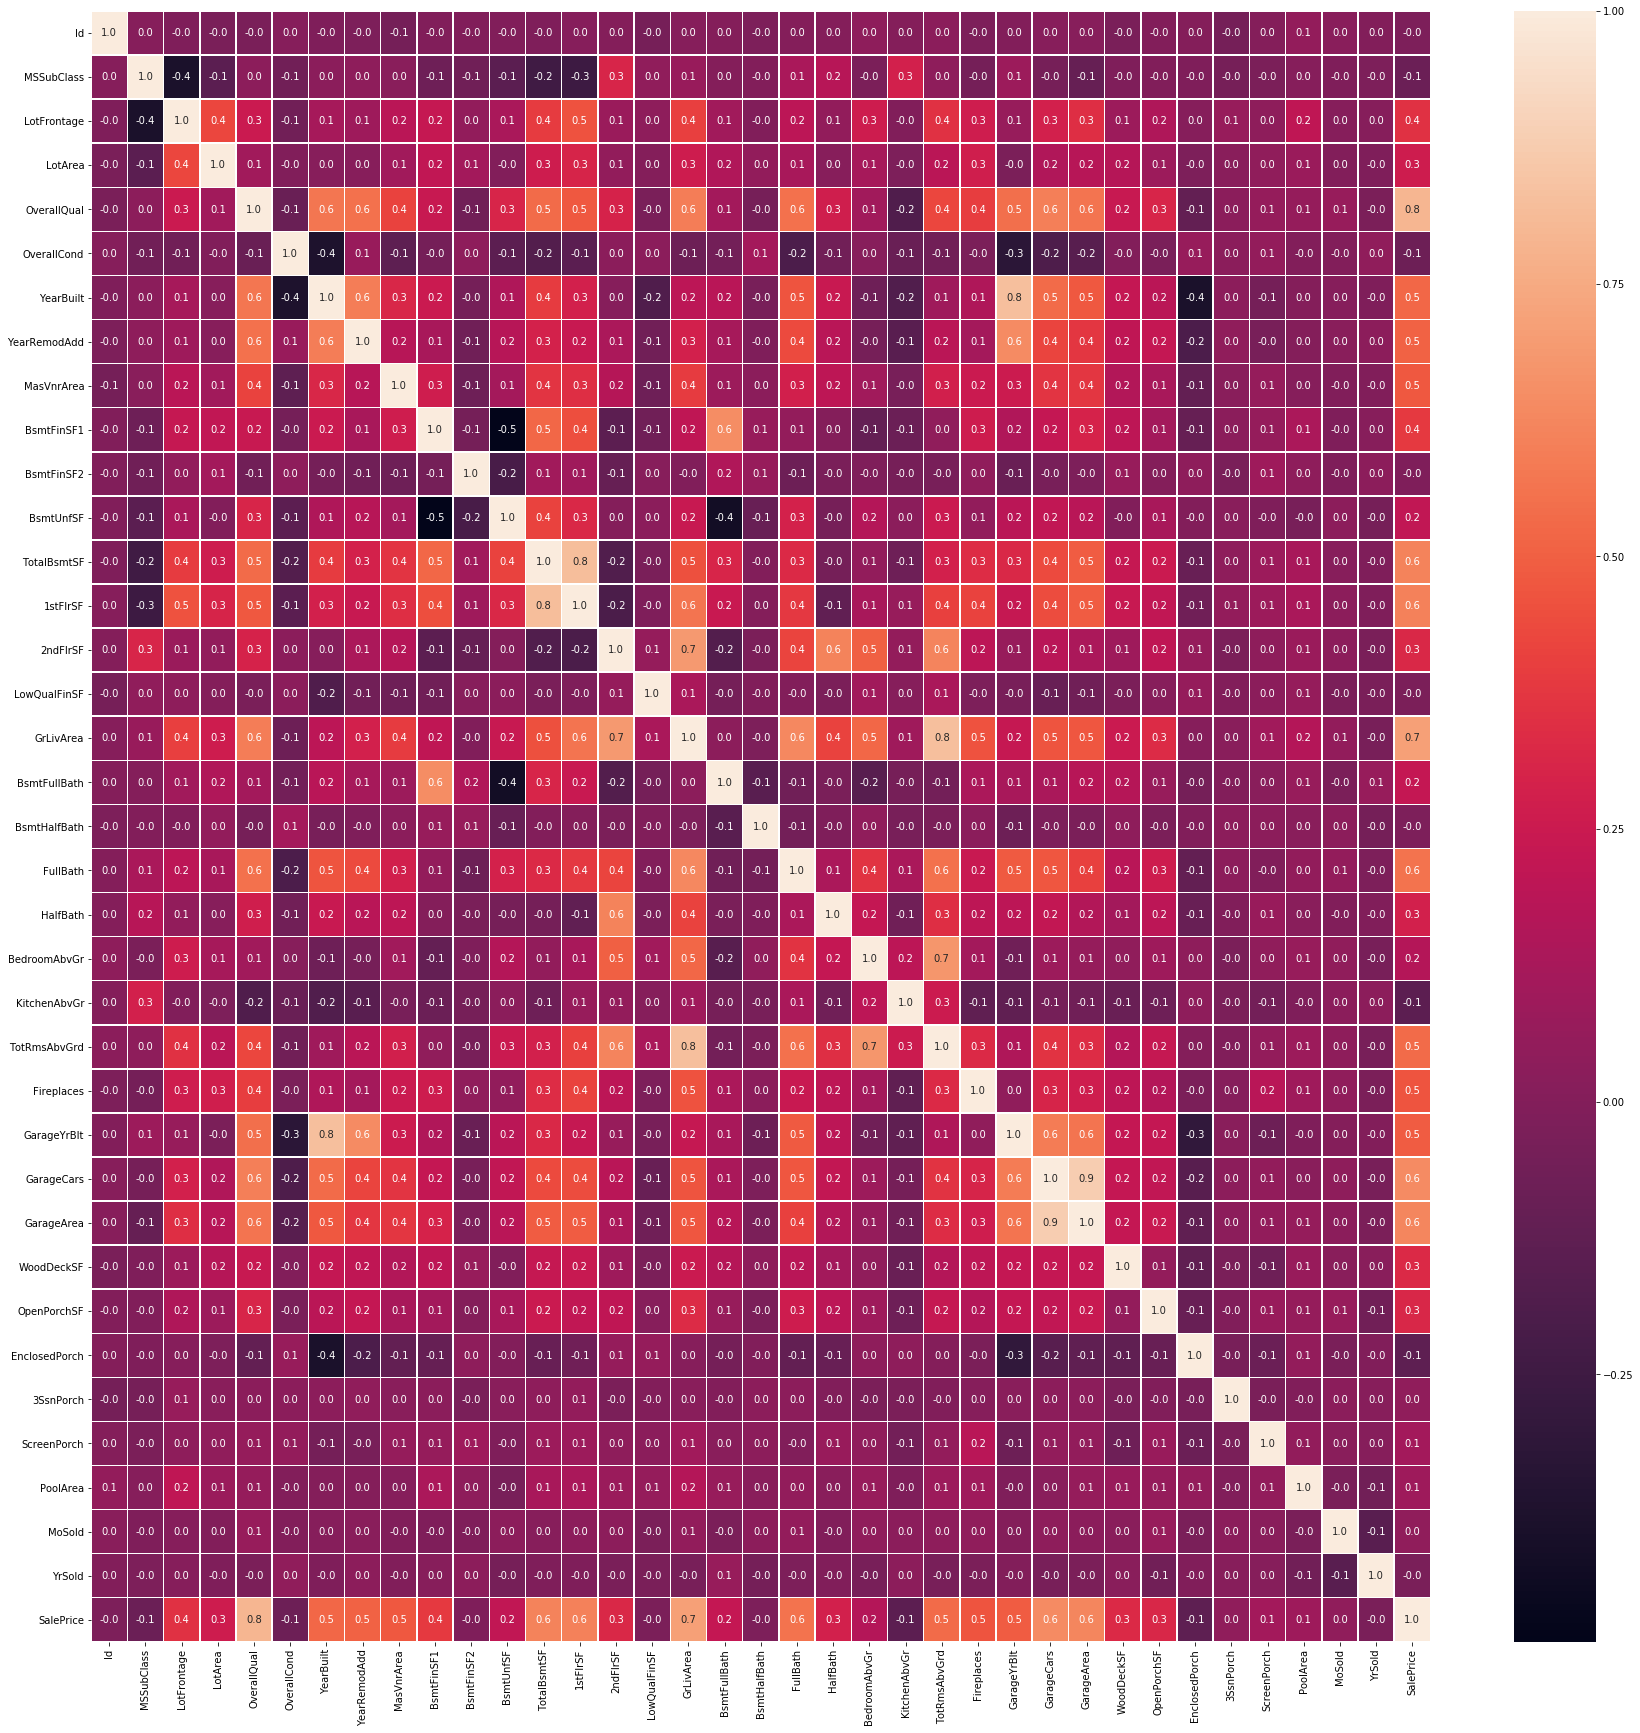

In [22]:
corr = data.corr()

f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
#my_cols1 = ['OverallQual', 'GrLivArea', 'LotArea']

In [44]:
cols = [ 'LotFrontage','LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',  'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',  'Fireplaces', 'GarageYrBlt' ,'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea']

In [49]:
data[cols].isnull().sum()

LotFrontage     0
LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
ScreenPorch     0
PoolArea        0
dtype: int64

In [50]:
data1 = data
data1.shape

(1460, 76)

In [51]:
data.MasVnrArea.value_counts()

0.000000       861
108.000000       8
180.000000       8
103.685262       8
72.000000        8
16.000000        7
120.000000       7
200.000000       6
80.000000        6
106.000000       6
340.000000       6
84.000000        5
360.000000       5
320.000000       5
132.000000       5
170.000000       5
183.000000       4
168.000000       4
178.000000       4
252.000000       4
270.000000       4
246.000000       4
196.000000       4
288.000000       4
100.000000       4
216.000000       4
160.000000       4
220.000000       4
336.000000       4
210.000000       4
              ... 
14.000000        1
53.000000        1
24.000000        1
138.000000       1
365.000000       1
562.000000       1
259.000000       1
293.000000       1
219.000000       1
161.000000       1
247.000000       1
452.000000       1
278.000000       1
375.000000       1
225.000000       1
604.000000       1
762.000000       1
290.000000       1
109.000000       1
299.000000       1
731.000000       1
167.000000  

In [52]:
data.MasVnrArea.mean()

103.68526170798896

In [53]:
# sklearn.preprocessing.Imputer(missing_values = 'NaN, strategy = 'mean', axis)
# Imputting or assigning missing values
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean')

data1[['MasVnrArea']] = imp.fit_transform(data[['MasVnrArea']])
data1.MasVnrArea.isnull().any()

False

In [54]:
# sklearn.preprocessing.Imputer(missing_values = 'NaN, strategy = 'mean', axis)
# Imputting or assigning missing values
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean')

data1[['LotFrontage']] = imp.fit_transform(data[['LotFrontage']])
data1.LotFrontage.isnull().any()

False

In [55]:
# sklearn.preprocessing.Imputer(missing_values = 'NaN, strategy = 'mean', axis)
# Imputting or assigning missing values
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean')

data[['LotFrontage']] = imp.fit_transform(data[['LotFrontage']])
data.LotFrontage.isnull().any()

False

In [56]:
imp = Imputer(missing_values = 'NaN', strategy = 'most_frequent')

data[['GarageYrBlt']] = imp.fit_transform(data[['GarageYrBlt']])
data.GarageYrBlt.isnull().any()

False

In [57]:
data1.GarageYrBlt.isnull().sum()

0

In [58]:
data['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [59]:
data.GarageYrBlt.value_counts()

2005.0    146
2006.0     59
2004.0     53
2003.0     50
2007.0     49
1977.0     35
1998.0     31
1999.0     30
2008.0     29
1976.0     29
2000.0     27
2002.0     26
1968.0     26
1950.0     24
1993.0     22
2009.0     21
1965.0     21
1966.0     21
1962.0     21
1958.0     21
2001.0     20
1996.0     20
1957.0     20
1970.0     20
1960.0     19
1997.0     19
1978.0     19
1954.0     19
1974.0     18
1994.0     18
         ... 
1922.0      5
1936.0      5
1916.0      5
1931.0      4
1945.0      4
1935.0      4
1928.0      4
1946.0      4
1982.0      4
1938.0      3
1921.0      3
1924.0      3
1910.0      3
1952.0      3
1932.0      3
2010.0      3
1923.0      3
1937.0      2
1934.0      2
1918.0      2
1947.0      2
1929.0      2
1914.0      2
1915.0      2
1942.0      2
1908.0      1
1927.0      1
1933.0      1
1900.0      1
1906.0      1
Name: GarageYrBlt, Length: 97, dtype: int64

In [60]:
data1.GarageYrBlt.isnull().sum()

0

In [61]:
data1.LotFrontage.isnull().sum()

0

In [62]:
data1.MasVnrArea.isnull().sum()

0

In [63]:
data1 = data[cols]

In [64]:
data1

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea
0,65.000000,8450,7,2003,2003,196.0,706,150,856,856,...,3,8,0,2003.0,2,548,0,61,0,0
1,80.000000,9600,6,1976,1976,0.0,978,284,1262,1262,...,3,6,1,1976.0,2,460,298,0,0,0
2,68.000000,11250,7,2001,2002,162.0,486,434,920,920,...,3,6,1,2001.0,2,608,0,42,0,0
3,60.000000,9550,7,1915,1970,0.0,216,540,756,961,...,3,7,1,1998.0,3,642,0,35,0,0
4,84.000000,14260,8,2000,2000,350.0,655,490,1145,1145,...,4,9,1,2000.0,3,836,192,84,0,0
5,85.000000,14115,5,1993,1995,0.0,732,64,796,796,...,1,5,0,1993.0,2,480,40,30,0,0
6,75.000000,10084,8,2004,2005,186.0,1369,317,1686,1694,...,3,7,1,2004.0,2,636,255,57,0,0
7,70.049958,10382,7,1973,1973,240.0,859,216,1107,1107,...,3,7,2,1973.0,2,484,235,204,0,0
8,51.000000,6120,7,1931,1950,0.0,0,952,952,1022,...,2,8,2,1931.0,2,468,90,0,0,0
9,50.000000,7420,5,1939,1950,0.0,851,140,991,1077,...,2,5,2,1939.0,1,205,0,4,0,0


In [65]:
reg = ExtraTreesRegressor()
reg = reg.fit(X_train, y_train)
reg.feature_importances_

NameError: name 'ExtraTreesRegressor' is not defined

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [67]:
feat_imp = pd.Series(reg.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Importance Score')

NameError: name 'reg' is not defined

In [96]:
cols = [ 'LotFrontage','LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',  'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',  'Fireplaces', 'GarageYrBlt' ,'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea']

In [97]:
X = data[cols]
y = data['SalePrice']

In [98]:
X.isnull().sum()

LotFrontage     0
LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
ScreenPorch     0
PoolArea        0
dtype: int64

In [99]:
#Split the data into training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=42)

In [102]:
#Fit a linear regression model
from sklearn import linear_model

In [103]:
lm=linear_model.LinearRegression()

In [104]:
lm.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
train_pred = lm.predict(X_train)

In [106]:
test_pred = lm.predict(X_test)

In [107]:
#R-squared score of this model
from sklearn.metrics import *
print("r-squared train")
r2_score(y_train, train_pred)

r-squared train


0.78954335902822037

In [108]:
print("r-squared test")
r2_score(y_test, test_pred)

r-squared test


0.81943175178950312

In [109]:
print("Mean absolute error train")
mean_absolute_error(y_train, train_pred)

Mean absolute error train


22215.531172940413

In [110]:
#Mean absolute error
mean_absolute_error(y_test, test_pred)

22817.130832484647

In [111]:
#Mean squared error
mean_squared_error(y_test, test_pred)

1264936383.7540472

In [112]:
#Median absolute error
median_absolute_error(y_test, test_pred)

16605.115098254755

In [113]:
print('rmse train')
np.sqrt(mean_squared_error(y_train, train_pred))


rmse train


35745.992055607712

In [114]:
print('rmse test')
np.sqrt(mean_squared_error(y_test, test_pred)) 

rmse test


35565.944156651422

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

## Decision Tree Regressor

In [116]:
X = data[cols]
y = data['SalePrice']

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [119]:
# Generating the Table Frame for metrics

rmse_dict = {}
def rmse(corrected, estimated):
    rmse_val = np.sqrt(mean_absolute_error(coreect, estimated))
    return rmse_val


# Generating the Table Frame for metrics
evaluation_table = pd.DataFrame({  'Model_desc':[],
                        'Model_param':[],
                        'r2_train': [],
                        'r2_test': [],
                        'rms_train':[], 
                        'rms_test': [],
                        'mae_train': [],
                        'mae_test': [],
                        'mape_train':[],
                        'mape_test':[],
                        })

#Evaluating the model
def evaluate_model(model, model_desc, model_param, X_train, y_train, X_test, y_test):
    
    global evaluation_table
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    try:
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
    except:
        r2_train = "not calculated"
        r2_test = "not calculated"
    try:
        rms_train = rmse(y_train, y_train_pred)
        rms_test = rmse(y_test, y_test_pred)
    except:
        rms_train = "not calculated"
        rms_test = "not calculated"
    try:
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
    except:
        mae_train = "not calculated"
        mae_test = "not calculated"
    try:
        mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
        mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    except:
        mape_train = "not calculated"
        mape_test = "not calculated"
    
    model_param = pd.DataFrame({'Model_desc':[model_desc],
                            'Model_param':[model_param],
                            'r2_train': [r2_train],
                            'r2_test': [r2_test],
                            'rms_train':[rms_train], 
                            'rms_test': [rms_test],
                            'mae_train': [mae_train],
                            'mae_test': [mae_test],
                            'mape_train':[mape_train],
                            'mape_test':[mape_test],
                           })
        
    evaluation_table = evaluation_table.append([model_param])
 
    return evaluation_table



In [120]:
#Fit a linear regression model
from sklearn import linear_model

In [121]:
lm=linear_model.LinearRegression()

In [122]:
lm.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
evaluate_model(lm, "LinearRegression", lm, X_train,y_train, X_test , y_test)

,Model_desc,Model_param,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",22817.130832,22215.531173,13.549083,13.25463,0.819432,0.789543,not calculated,not calculated
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",22817.130832,22215.531173,13.549083,13.25463,0.819432,0.789543,not calculated,not calculated


In [125]:
# Define model
regDTree = DecisionTreeRegressor()

In [126]:
# Fit model
regDT = regDTree.fit(X_train, y_train)

In [127]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [128]:
evaluate_model(regDT, "DecisionTreeRegressor", regDT, X_train,y_train, X_test , y_test)

,Model_desc,Model_param,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",22817.130832,22215.531173,13.549083,13.254630,0.819432,0.789543,not calculated,not calculated
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",22817.130832,22215.531173,13.549083,13.254630,0.819432,0.789543,not calculated,not calculated
0,DecisionTreeRegressor,"DecisionTreeRegressor(criterion='mse', max_dep...",24589.052055,13.833790,14.999222,0.009466,0.807088,0.999991,not calculated,not calculated


In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
# Define Model
randomFReg = RandomForestRegressor()

In [131]:
# Fit Model
randFReg = randomFReg.fit(X_train, y_train)

In [132]:
evaluate_model(randFReg, "Random Forest Regressor", randFReg, X_train, y_train, X_test , y_test)

,Model_desc,Model_param,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",22817.130832,22215.531173,13.549083,13.254630,0.819432,0.789543,not calculated,not calculated
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",22817.130832,22215.531173,13.549083,13.254630,0.819432,0.789543,not calculated,not calculated
0,DecisionTreeRegressor,"DecisionTreeRegressor(criterion='mse', max_dep...",24589.052055,13.833790,14.999222,0.009466,0.807088,0.999991,not calculated,not calculated
0,Random Forest Regressor,"(DecisionTreeRegressor(criterion='mse', max_de...",18141.440274,7915.005449,10.934777,4.667342,0.888451,0.973813,not calculated,not calculated


In [135]:
import xgboost as xgb
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [136]:
!pip3 install xgboost

  Using cached https://files.pythonhosted.org/packages/4b/c4/57e246bc99e45c048f9805f2773e7369f0d30896d19fa089fa1794c7b246/xgboost-0.71.tar.gz


No files/directories in C:\Users\Nikesh\AppData\Local\Temp\pip-install-m18sddit\xgboost\pip-egg-info (from PKG-INFO)
You are using pip version 10.0.0, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
